In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import re

In [2]:
master=pd.read_csv(r'C:\Users\Jose Ramon Romero P\Documents\NYU\Semester 2\Capstone 1\NYC-Rezoning-evaluation\data\mappluto_nyc\mappluto_nyc\master2_2010_2017.csv')

C:\Users\Jose Ramon Romero P\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
#Creating csv to merge bbl, geoid, if needed
'''
master=master[master.year_x==2017]
m=['bbl' ,'geoid', 'borough',
       'zipcode'] 
master=master[m]
master.to_csv(r'C:\Users\Jose Ramon Romero P\Documents\NYU\Semester 2\Capstone 1\NYC-Rezoning-evaluation\data\mappluto_nyc\mappluto_nyc\bbl_geoid_borough.csv')
'''

# bbl codes by each year

In [227]:
master['count']=1

In [228]:
pv=pd.pivot_table(master,values='count',index=['bbl'],columns=['year_x'],aggfunc=np.sum)

In [229]:
pv['total']=pv.sum(axis=1)

In [230]:
pv=pv[pv['total']==8].reset_index()['bbl']
pv

0         1.000010e+09
1         1.000010e+09
2         1.000020e+09
3         1.000030e+09
4         1.000030e+09
              ...     
839495    5.080500e+09
839496    5.080500e+09
839497    5.080500e+09
839498    5.080500e+09
839499    5.080500e+09
Name: bbl, Length: 839500, dtype: float64

In [231]:
master.columns

Index(['Unnamed: 0', 'bbl', 'geoid', 'year_x', 'borough', 'lot', 'cd',
       'zipcode', 'zonedist1', 'zonedist2', 'zonedist3', 'zonedist4',
       'overlay1', 'overlay2', 'spdist1', 'spdist2', 'ltdheight', 'allzoning1',
       'allzoning2', 'splitzone', 'bldgclass', 'landuse', 'easements',
       'ownertype', 'lotarea', 'comarea', 'resarea', 'officearea',
       'retailarea', 'garagearea', 'strgearea', 'factryarea', 'lotfront',
       'lotdepth', 'otherarea', 'numbldgs', 'numfloors', 'unitsres',
       'lotfront.1', 'lotdepth.1', 'assessland', 'assesstot', 'yearbuilt',
       'builtfar', 'maxallwfar', 'residfar', 'commfar', 'facilfar', 'statefp',
       'countyfp', 'tractce', 'blkgrpce', 'med_income', 'population',
       'low_edu', 'income_pc', 'housing_units', 'geometry', 'subway_acc',
       'subway', 'subway_scale', '%low_educ', 'noisePerCapita', 'tractid',
       'built_green', 'count'],
      dtype='object')

# Removing wrong values in the dataset

In [232]:
master=master[~(master.built_green.isna())]

In [233]:
master=master[~(master.lotarea==0)]

In [234]:
master=master[~(master.lotfront==0)]


In [235]:
master=master[~(master.lotdepth==0)]

<AxesSubplot:>

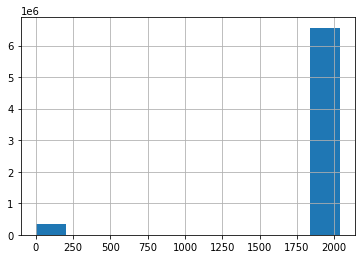

In [236]:
master.yearbuilt.hist()

In [237]:
master=master[~(master.yearbuilt<300)]

In [238]:
master.builtfar.describe()

count    6.570394e+06
mean     1.156746e+00
std      7.179251e+00
min      0.000000e+00
25%      5.200000e-01
50%      8.000000e-01
75%      1.300000e+00
max      8.695000e+03
Name: builtfar, dtype: float64

In [239]:
#master=master[~(master.builtfar>200)]

In [240]:
for i in ['maxallwfar', 'residfar', 'commfar','facilfar']:
    master[i]=master[i].fillna(0)

In [241]:
master['maxfar']=master[['residfar','commfar','facilfar']].max(axis=1)+master['maxallwfar']

In [242]:
master['low_educ']=master['%low_educ'].fillna(0)

In [243]:
master.columns

Index(['Unnamed: 0', 'bbl', 'geoid', 'year_x', 'borough', 'lot', 'cd',
       'zipcode', 'zonedist1', 'zonedist2', 'zonedist3', 'zonedist4',
       'overlay1', 'overlay2', 'spdist1', 'spdist2', 'ltdheight', 'allzoning1',
       'allzoning2', 'splitzone', 'bldgclass', 'landuse', 'easements',
       'ownertype', 'lotarea', 'comarea', 'resarea', 'officearea',
       'retailarea', 'garagearea', 'strgearea', 'factryarea', 'lotfront',
       'lotdepth', 'otherarea', 'numbldgs', 'numfloors', 'unitsres',
       'lotfront.1', 'lotdepth.1', 'assessland', 'assesstot', 'yearbuilt',
       'builtfar', 'maxallwfar', 'residfar', 'commfar', 'facilfar', 'statefp',
       'countyfp', 'tractce', 'blkgrpce', 'med_income', 'population',
       'low_edu', 'income_pc', 'housing_units', 'geometry', 'subway_acc',
       'subway', 'subway_scale', '%low_educ', 'noisePerCapita', 'tractid',
       'built_green', 'count', 'maxfar', 'low_educ'],
      dtype='object')

In [244]:
var=[ 'bbl', 'geoid', 'year_x', 'zonedist1', 'bldgclass', 'landuse', 'easements',
       'ownertype', 'lotarea', 'comarea', 'resarea', 'officearea',
       'retailarea', 'garagearea', 'strgearea', 'factryarea', 'lotfront',
       'lotdepth', 'assessland', 'assesstot', 'yearbuilt',
       'builtfar',  'med_income',  'housing_units','subway_acc',
         'noisePerCapita', 'built_green', 'maxfar', 'low_educ']

In [245]:
master=master[var]

In [246]:
master.zonedist1.unique()

array(['M3-1', 'M1-3/R8', 'M2-1', 'R6', 'M1-5/R8A', 'M1-2/R6A', 'PARK',
       'M1-4/R7A', 'M1-4/R7X', 'M1-4', 'R7-2', 'M1-2', 'C6-2A', 'C4-4',
       'M1-4/R6A', 'R7-1', 'M1-3', 'C8-3', 'M1-1', 'C8-2', 'R3A', 'R3-2',
       'R5', 'R4', 'C8-1', 'R1-1', 'R4-1', 'R8', 'M1-4/R8A', 'C6-2',
       'M1-5', 'C4-6', 'C6-3D', 'R8A', 'M1-1/R7-2', 'R7A', 'R7X', 'R1-2',
       'R2', 'R6A', 'R4A', 'R3-1', 'R5B', 'R5A', 'C4-2', 'PARKNYS', 'C3',
       'R6B', 'C4-1', 'C4-5X', 'C4-4A', 'C4-4D', 'R5D', 'C8-4', 'R3X',
       'C4-3', 'C3A', 'C7', 'M1-1/R5', 'M1-2D', 'C4-3A', 'C5-2A', 'C5-4',
       'C6-4', 'C6-4.5', 'C6-1', 'C6-1A', 'M1-6', 'M1-2/R8A', 'M1-5/R9-1',
       'M1-2/R8', 'M1-2/R6', 'R7B', 'M1-1D', 'M1-4/R7-2', 'R8B', 'R4B',
       'C4-2A', 'M1-2/R6B', 'R7D', 'R2X', 'C4-5D', 'R8X', 'C6-3A',
       'M1-1/R7D', 'M3-2', 'R7-3', 'M1-2/R7A', 'C5-5', 'C6-9', 'BPC',
       'C5-3', 'R10A', 'C4-6A', 'M2-3', 'R10', 'C6-3', 'C2-8', 'C2-7A',
       'C1-8A', 'C4-7', 'C2-7', 'R9', 'C1-8', 'C6-6', 'C5-1', 'R

# Creating a zoning category

In [247]:
zoning=[]
for index,row in master.iterrows():
    if ('R' in row['zonedist1']) & ('M' in row['zonedist1']):
        zoning.append('Mixed')
    elif (re.match("^[R][0-9]", row['zonedist1'])):
        zoning.append('Residential')
    elif ('C' in row['zonedist1']):
        zoning.append('Commercial')
    elif ('M' in row['zonedist1']):
        zoning.append('Manufacturing')
    else:
        zoning.append('Other')

In [248]:
master['zoning']=zoning

In [249]:
master=pd.concat([master,pd.get_dummies(master['zoning'],prefix='zon')],axis=1)

In [250]:
master

,bbl,geoid,year_x,zonedist1,bldgclass,landuse,easements,ownertype,lotarea,comarea,...,noisePerCapita,built_green,maxfar,low_educ,zoning,zon_Commercial,zon_Manufacturing,zon_Mixed,zon_Other,zon_Residential
2,2.022600e+09,360050019004,2010,M3-1,E9,6.0,0,P,45053,860,...,0.0,0.158909,2.0,0.000000,Manufacturing,0,1,0,0,0
3,2.025831e+09,360050019004,2010,M3-1,Z6,NaN,0,X,3622,0,...,0.0,0.158909,2.0,0.000000,Manufacturing,0,1,0,0,0
5,2.023160e+09,360050019004,2010,M1-3/R8,G1,10.0,0,P,133700,83064,...,0.0,0.158909,7.2,0.000000,Mixed,0,0,1,0,0
7,2.025830e+09,360050019004,2010,M3-1,Z9,NaN,0,P,145500,86992,...,0.0,0.158909,2.0,0.000000,Manufacturing,0,1,0,0,0
8,2.025830e+09,360050019004,2010,M3-1,Z9,NaN,2,P,412300,15000,...,0.0,0.158909,2.0,0.000000,Manufacturing,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946818,5.026410e+09,360850228001,2017,R3A,A5,1.0,0,NaN,2900,0,...,0.0,0.533950,1.0,0.443554,Residential,0,0,0,0,1
6946819,5.026410e+09,360850228001,2017,R3A,A1,1.0,0,NaN,2693,0,...,0.0,0.533950,1.0,0.443554,Residential,0,0,0,0,1
6946820,5.026410e+09,360850228001,2017,R3A,A1,1.0,0,NaN,2620,0,...,0.0,0.533950,1.0,0.443554,Residential,0,0,0,0,1
6946821,5.026410e+09,360850228001,2017,R3A,A5,1.0,0,NaN,2533,0,...,0.0,0.533950,1.0,0.443554,Residential,0,0,0,0,1


#### Building class

In [251]:
master.bldgclass.isna().sum()

0

In [252]:
def decode(buil_class):
    if 'A' in buil_class:
        return 'One Family Dwellings'
    elif 'B' in buil_class:
        return 'Two Family Dwellings'
    elif 'C' in buil_class:
        return 'Walk up apartments'
    elif 'D' in buil_class:
        return 'Elevator apartments'
    elif 'E' in buil_class:
        return 'Warehouses'
    elif 'F' in buil_class:
        return 'Factory and industrial buildings'
    elif 'G' in buil_class:
        return 'Garages and gasoline stations'
    elif 'H' in buil_class:
        return 'Hotels'
    elif 'I' in buil_class:
        return 'Hospitals and Health'
    elif 'J' in buil_class:
        return 'Theatres'
    elif 'K' in buil_class:
        return 'Store buildings'
    elif 'L' in buil_class:
        return 'Loft buildings'
    elif 'M' in buil_class:
        return 'Churches, synagogues, etc.'
    elif 'N' in buil_class:
        return 'Asylums and homes'
    elif 'O' in buil_class:
        return 'Office buildings'
    elif 'P' in buil_class:
        return 'Places of public assembly'
    elif 'Q' in buil_class:
        return 'Outdoor recreation facilities'
    elif 'R' in buil_class:
        return 'Condominiums'
    elif 'S' in buil_class:
        return 'Residence- multiple use'
    elif 'T' in buil_class:
        return 'Transportation facilities'
    elif 'U' in buil_class:
        return 'Utility bureau properties'
    elif 'V' in buil_class:
        return 'Vacant land'
    elif 'W' in buil_class:
        return 'Educational structures'
    elif 'Y' in buil_class:
        return 'Government installations'
    elif 'Z' in buil_class:
        return 'Miscellaneous'

In [253]:
#master['build_code']=[decode(row['bldgclass']) for index,row in master.iterrows()]

#### Land use

In [254]:
def decode_landuse(x):
    if x==1.0:
        return 'One & Two Family bouldings'
    elif x==2.0:
        return 'Multi-Family Walk-up Buildings'
    elif x==3.0:
        return 'Multi-Family Elevator Buildings'
    elif x==4.0:
        return 'Mixed residential & Commercial Buildings'
    elif x==5.0:
        return 'Commercial & Office Buildings'
    elif x==6.0:
        return 'Industrial & Manufacturing Buildings'
    elif x==7.0:
        return 'Transportation & utility'
    elif x==8.0:
        return 'Public Facilities & Institutions'
    elif x==9.0:
        return 'Open Space & Outdoor Recreation'
    elif x==10.0:
        return 'Parking Facilities'
    elif x==11.0:
        return 'Vacant Land'


In [255]:
master[master.landuse.isna()].bldgclass.unique()

array(['Z6', 'Z9', 'Y5'], dtype=object)

In [256]:
master=master[~(master.landuse.isna())]

In [257]:
#master['land_use']=[decode_landuse(row['land_use']) for index,row in master.iterrows()]

In [258]:
master=pd.concat([master,pd.get_dummies(master['landuse'],prefix='land_use')],axis=1)

In [259]:
master

,bbl,geoid,year_x,zonedist1,bldgclass,landuse,easements,ownertype,lotarea,comarea,...,land_use_2.0,land_use_3.0,land_use_4.0,land_use_5.0,land_use_6.0,land_use_7.0,land_use_8.0,land_use_9.0,land_use_10.0,land_use_11.0
2,2.022600e+09,360050019004,2010,M3-1,E9,6.0,0,P,45053,860,...,0,0,0,0,1,0,0,0,0,0
5,2.023160e+09,360050019004,2010,M1-3/R8,G1,10.0,0,P,133700,83064,...,0,0,0,0,0,0,0,0,1,0
10,2.025830e+09,360050019004,2010,M3-1,F2,6.0,0,P,350500,445625,...,0,0,0,0,1,0,0,0,0,0
12,2.025430e+09,360050019004,2010,M3-1,F1,6.0,2,P,54543,47851,...,0,0,0,0,1,0,0,0,0,0
17,2.022600e+09,360050019004,2010,M3-1,E1,6.0,0,P,153200,98000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946818,5.026410e+09,360850228001,2017,R3A,A5,1.0,0,NaN,2900,0,...,0,0,0,0,0,0,0,0,0,0
6946819,5.026410e+09,360850228001,2017,R3A,A1,1.0,0,NaN,2693,0,...,0,0,0,0,0,0,0,0,0,0
6946820,5.026410e+09,360850228001,2017,R3A,A1,1.0,0,NaN,2620,0,...,0,0,0,0,0,0,0,0,0,0
6946821,5.026410e+09,360850228001,2017,R3A,A5,1.0,0,NaN,2533,0,...,0,0,0,0,0,0,0,0,0,0


#### Easements

In [260]:
master.easements.isna().sum()

0

<AxesSubplot:>

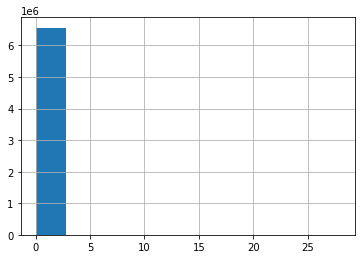

In [261]:
master.easements.hist()

#### Owner type

In [262]:
master.ownertype.isna().sum()

5864525

#### Lot area

In [263]:
master.lotarea.isna().sum()

0

#### Area by land use

In [264]:
area=['comarea', 'resarea', 'officearea',
       'retailarea', 'garagearea', 'strgearea', 'factryarea']
new=['comm_built_far','res_built_far','office_built_far','retail_built_far',
     'garage_built_far','storage_built_far','factry_built_far']
for i in range(len(area)):
    master[new[i]]=master[area[i]]/master['lotarea']

#### assesland and assesstot

<AxesSubplot:>

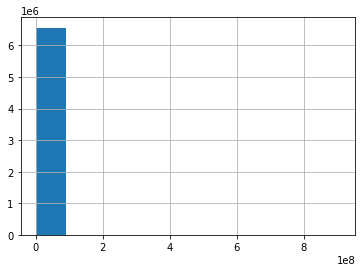

In [265]:
master.assessland.hist()

<AxesSubplot:>

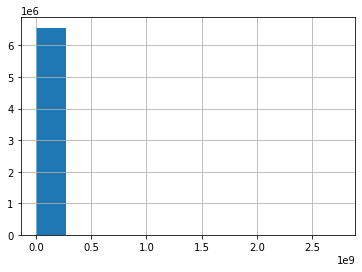

In [266]:
master.assesstot.hist()

#### Year built

In [267]:
master.yearbuilt.describe()

count    6.563824e+06
mean     1.940151e+03
std      2.875959e+01
min      1.661000e+03
25%      1.920000e+03
50%      1.931000e+03
75%      1.955000e+03
max      2.040000e+03
Name: yearbuilt, dtype: float64

#### med_income

<AxesSubplot:>

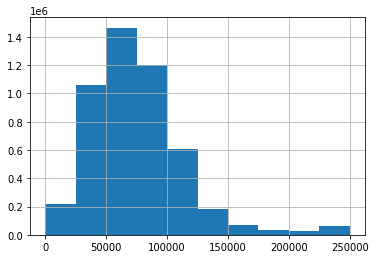

In [268]:
master.med_income.hist()

#### subway_acc

<AxesSubplot:>

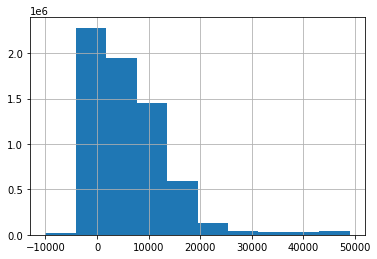

In [269]:
master.subway_acc.hist()

#### Noise per capita

<AxesSubplot:>

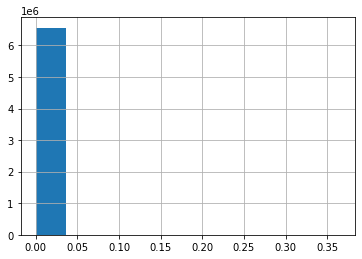

In [270]:
master.noisePerCapita.hist()

#### Low education

<AxesSubplot:>

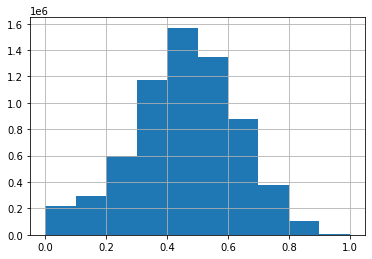

In [271]:
master.low_educ.hist()

In [272]:
master.columns

Index(['bbl', 'geoid', 'year_x', 'zonedist1', 'bldgclass', 'landuse',
       'easements', 'ownertype', 'lotarea', 'comarea', 'resarea', 'officearea',
       'retailarea', 'garagearea', 'strgearea', 'factryarea', 'lotfront',
       'lotdepth', 'assessland', 'assesstot', 'yearbuilt', 'builtfar',
       'med_income', 'housing_units', 'subway_acc', 'noisePerCapita',
       'built_green', 'maxfar', 'low_educ', 'zoning', 'zon_Commercial',
       'zon_Manufacturing', 'zon_Mixed', 'zon_Other', 'zon_Residential',
       'land_use_1.0', 'land_use_2.0', 'land_use_3.0', 'land_use_4.0',
       'land_use_5.0', 'land_use_6.0', 'land_use_7.0', 'land_use_8.0',
       'land_use_9.0', 'land_use_10.0', 'land_use_11.0', 'comm_built_far',
       'res_built_far', 'office_built_far', 'retail_built_far',
       'garage_built_far', 'storage_built_far', 'factry_built_far'],
      dtype='object')

In [273]:
model_var=['bbl', 'geoid', 'year_x', 'easements', 'lotarea', 'lotfront',
       'lotdepth', 'assessland', 'assesstot', 'yearbuilt', 'builtfar',
       'med_income', 'housing_units', 'subway_acc', 'noisePerCapita',
       'built_green', 'maxfar', 'low_educ', 'comm_built_far',
       'res_built_far', 'office_built_far', 'retail_built_far',
       'garage_built_far', 'storage_built_far', 'factry_built_far',
       'zon_Commercial', 'zon_Manufacturing', 'zon_Mixed', 'zon_Other',
       'zon_Residential', 'land_use_1.0', 'land_use_2.0', 'land_use_3.0',
       'land_use_4.0', 'land_use_5.0', 'land_use_6.0', 'land_use_7.0',
       'land_use_8.0', 'land_use_9.0', 'land_use_10.0', 'land_use_11.0']

In [274]:
master=master[model_var]

In [275]:
master=master[(master.year_x==2010) | (master.year_x==2012) | (master.year_x==2014) | (master.year_x==2017)]

In [276]:
master.isna().sum()

bbl                  0
geoid                0
year_x               0
easements            0
lotarea              0
lotfront             0
lotdepth             0
assessland           0
assesstot            0
yearbuilt            0
builtfar             0
med_income           0
housing_units        0
subway_acc           0
noisePerCapita       0
built_green          0
maxfar               0
low_educ             0
comm_built_far       0
res_built_far        0
office_built_far     0
retail_built_far     0
garage_built_far     0
storage_built_far    0
factry_built_far     0
zon_Commercial       0
zon_Manufacturing    0
zon_Mixed            0
zon_Other            0
zon_Residential      0
land_use_1.0         0
land_use_2.0         0
land_use_3.0         0
land_use_4.0         0
land_use_5.0         0
land_use_6.0         0
land_use_7.0         0
land_use_8.0         0
land_use_9.0         0
land_use_10.0        0
land_use_11.0        0
dtype: int64

In [ ]:
master=master.drop_duplicates(subset=['bbl','year_x'])

In [277]:
master.to_csv(r'C:\Users\Jose Ramon Romero P\Documents\NYU\Semester 2\Capstone 1\NYC-Rezoning-evaluation\data\mappluto_nyc\mappluto_nyc\master_pre_model2010_2017.csv')